In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Problem 1

In [16]:
p_head = 0.6
p_tail = 1 - p_head
NUM_SIM = 30

def sim_rand_walk(p_head=p_head, p_tail=p_tail, num_sim=NUM_SIM):
    pos_store = [0]
    for i in range(num_sim):
        if random.random() < p_head:
            move = pos_store[-1] + 1
        else:
            move = pos_store[-1] - 1
        pos_store.append(move)
        
    return pos_store

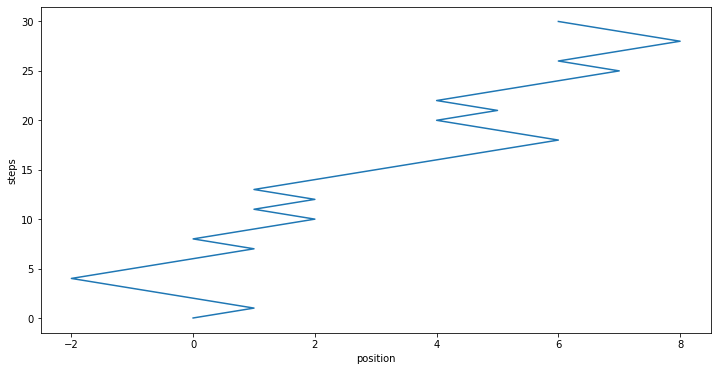

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(sim_rand_walk(), range(NUM_SIM + 1))
plt.ylabel('steps')
plt.xlabel('position')
plt.show()

In [58]:
final_pos = []
for i in range(200):
    pos_store = sim_rand_walk()
    final_pos.append(pos_store[-1])

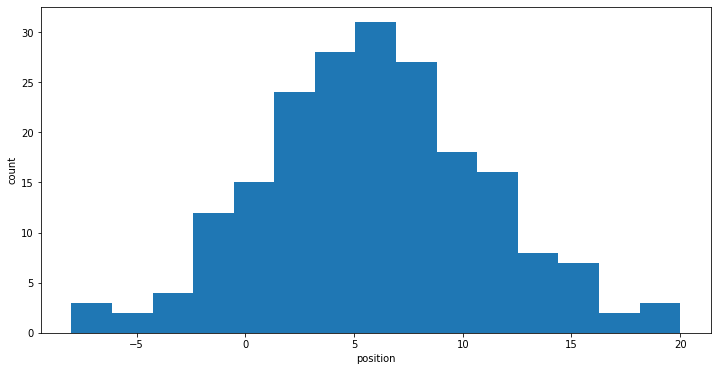

In [59]:
plt.figure(figsize=(12, 6))
plt.hist(final_pos, bins=15)
plt.ylabel('count')
plt.xlabel('position')
plt.show()

In [60]:
print("mean: {0}, variance: {1}".format(np.mean(final_pos), np.var(final_pos)))

mean: 5.89, variance: 30.6879


The mean should be 6 because we are 20% as likely to move to the right than to the left, so on average we should shift by 20% of the total steps taken (0.2 * 30 = 6). Not sure about the variance but it's about 30 for some reason! 

## Problem 2

In [ ]:
> R=zeros(1,2000000); % vector of 2,000,000 zeros
> i=1; R(i)=100; % gambler’s initial fortune
> while( R(i)>0 &R(i)<2100 )
i=i+1;
W = (rand <0.5); % random value of 0 or 1 W = 2*W - 1; % random value of +/-1 R(i)= R(i-1)+W; % gamblers new fortune
end
> plot(1:length(R),R) % plot R against its index > %%% run for investigating running time
> for j=1:20
> i=1; R(i)=100;
> while( R(i)>0 &R(i)<2100 )
i=i+1;
W = 2*(rand <0.5)-1; R(i)= R(i-1)+W;
end
> T(j)=i > end
> hist(T)

In [98]:
MAX_GAMES = 2000000

def gamblers_ruin(max_games=MAX_GAMES):
    r = np.zeros(max_games)
    i = 0
    r[0] = 100

    while 0 < r[i] < 2100 and i < MAX_GAMES - 2:  # limit on how long the game can run
        i += 1
        w = int(random.random() < 0.5)
        w = 2*w - 1
        r[i] = r[i - 1] + w 
    stop = i
    
    return r, stop

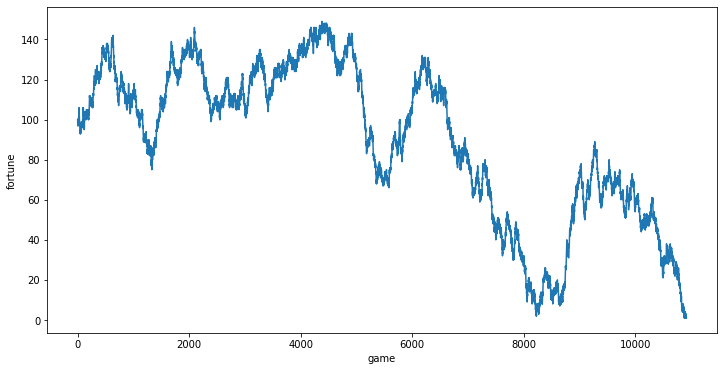

In [99]:
r, stop = gamblers_ruin()

plt.figure(figsize=(12, 6))
plt.plot(range(stop), r[:stop])
plt.xlabel('game')
plt.ylabel('fortune')
plt.show()

In [102]:
num_games = []
sample_sz = [20, 100, 500]

for k in sample_sz:
    num_games.append([])
    for i in range(k):
        _, stop = gamblers_ruin()
        num_games[-1].append(stop)

In [104]:
for i in range(len(sample_sz)):
    var = np.var(num_games[i])
    mean = np.mean(num_games[i])
    print('{0} samples: mean game duration = {1}, variance={2}'.format(sample_sz[i], mean, var))

20 samples: mean game duration = 119709.0, variance=72853778536.2
100 samples: mean game duration = 185459.02, variance=195459783321.95956
500 samples: mean game duration = 160330.664, variance=157260423289.4471


Variance of the end result gets larger and then smaller again. Maybe at 100 samples we can see some outliers (where games last very long) so it skews the mean up and makes the variance big. When we have a lot of samples (500), the actual probability of game lengths play a role here, downweighting the extreme events and reducing the variance. The variance of 500 samples is higher than that of 20 samples because in the latter, we might not actually observe extreme events.

In [110]:
list(set({3, 4, 2}))[0]

2